## Model no 3

Target:
+ life_ladder  

Features:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth
+ freedom_to_make_life_choices


import libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
model_name = 'model_03'

function section

In [44]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [45]:
df = pd.read_csv("../data/life_ladder_2005_2022_no3_gdp_sosupp_lifeexp_freed.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2095 non-null   object 
 1   year                              2095 non-null   int64  
 2   life_ladder                       2095 non-null   float64
 3   log_gdp_per_capita                2095 non-null   float64
 4   social_support                    2095 non-null   float64
 5   healthy_life_expectancy_at_birth  2095 non-null   float64
 6   freedom_to_make_life_choices      2095 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 114.7+ KB


Define features and Target:

In [47]:
features = df.columns.tolist()
features.remove('country_name')
features.remove('year')
features.remove('life_ladder')

X = df[features]
y = df['life_ladder']

In [48]:
X.columns

Index(['log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices'],
      dtype='object')

In [49]:
print(X.shape, y.shape)

(2095, 4) (2095,)


Train-Test-Split:

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123)

In [51]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1466, 4) (629, 4) (1466,) (629,)


In [52]:
X_train.describe()

,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices
count,1466.000000,1466.000000,1466.000000,1466.000000
mean,9.361317,0.808351,63.262622,0.749613
std,1.164253,0.124790,6.989239,0.140085
min,5.527000,0.290000,6.720000,0.258000
25%,8.477000,0.741250,59.105000,0.659000
50%,9.502500,0.836000,65.077500,0.772000
75%,10.327500,0.906000,68.400000,0.861750
max,11.660000,0.987000,74.475000,0.985000


## Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scatterplot with scaled and non-scaled data, both features (correlation)

In [54]:
X_train_scaled.shape

(1466, 4)

In [55]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

<Axes: xlabel='freedom_to_make_life_choices', ylabel='life_ladder'>

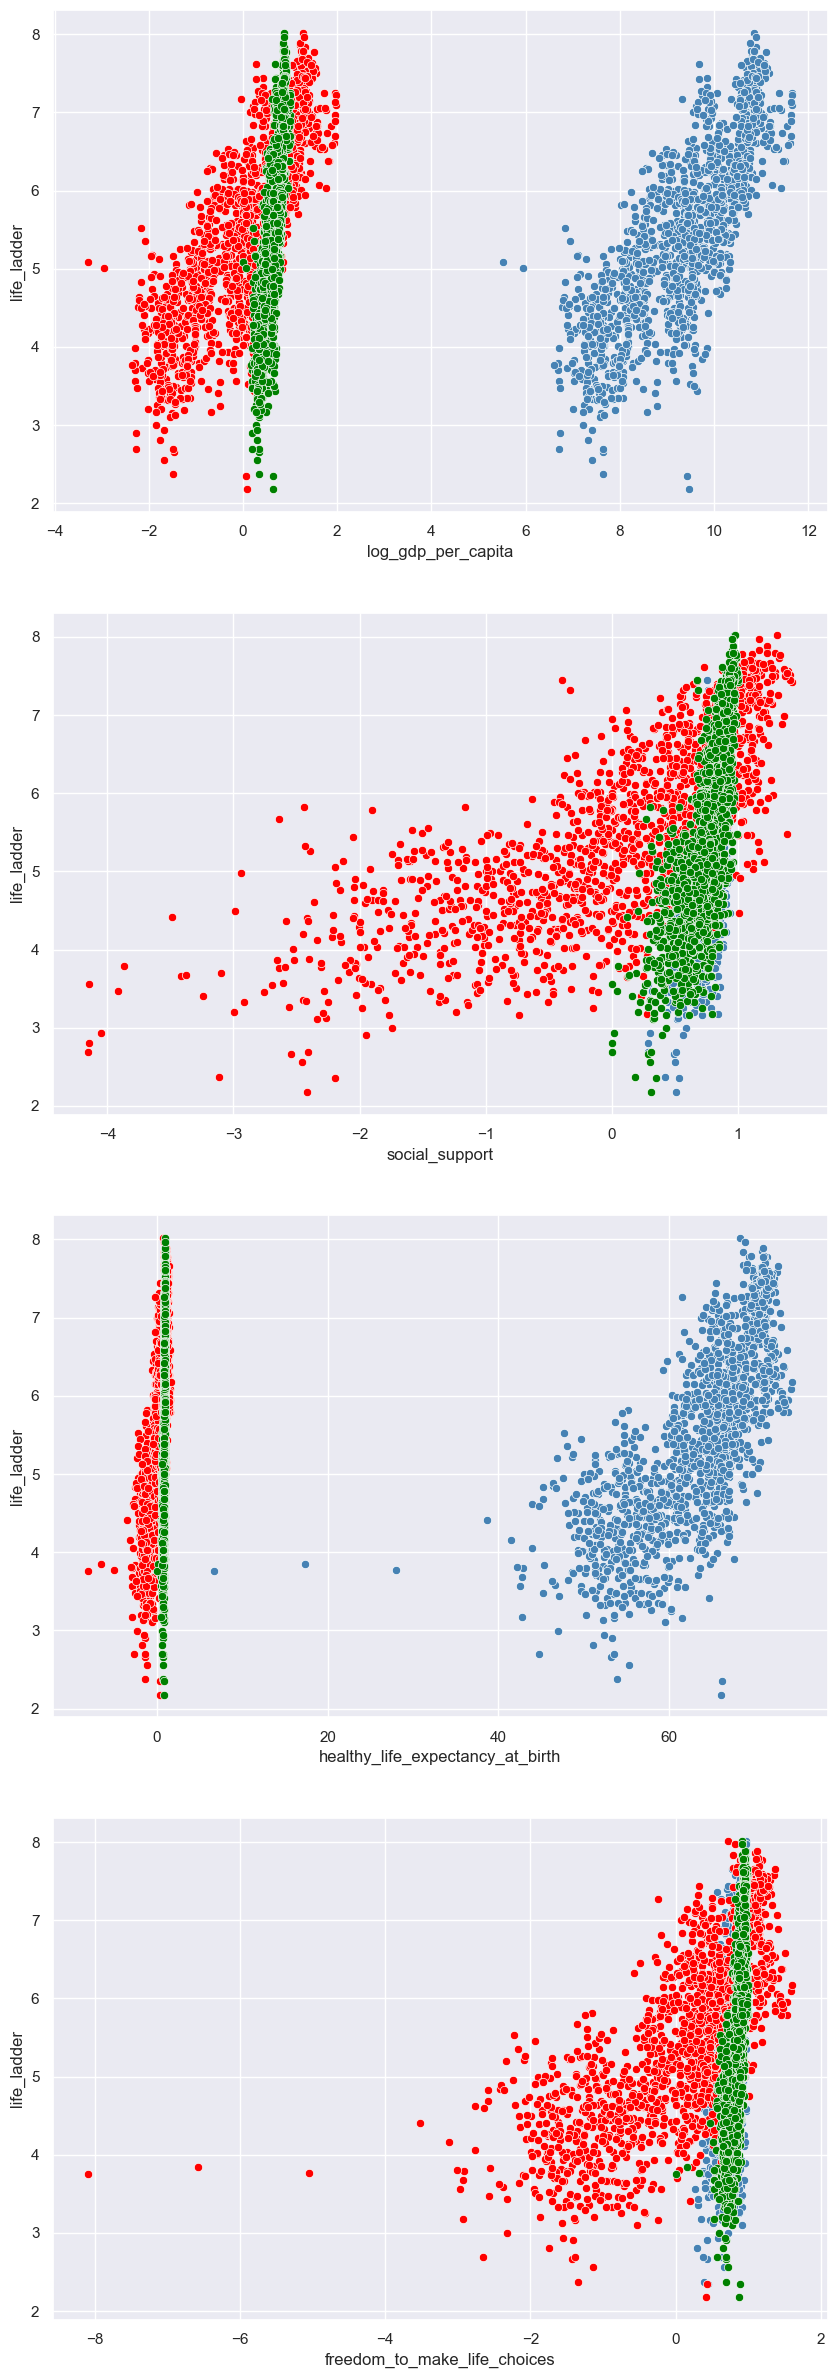

In [56]:
fig,ax = plt.subplots(4,1,figsize=(10,30))
sns.scatterplot(ax= ax[0], x = X_train.log_gdp_per_capita, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[0], x = X_train_scaled[:,0], y = y_train, color = 'red')
sns.scatterplot(ax= ax[0], x = X_train_normalized[:,0], y = y_train, color = 'green')
sns.scatterplot(ax= ax[1], x = X_train.social_support, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[1], x = X_train_scaled[:,1], y = y_train, color = 'red')
sns.scatterplot(ax= ax[1], x = X_train_normalized[:,1], y = y_train, color = 'green')
sns.scatterplot(ax= ax[2], x = X_train.healthy_life_expectancy_at_birth, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[2], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[2], x = X_train_normalized[:,2], y = y_train, color = 'green')
sns.scatterplot(ax= ax[3], x = X_train.freedom_to_make_life_choices, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[3], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[3], x = X_train_normalized[:,2], y = y_train, color = 'green')

Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [103]:
lin_reg_error_lst = []

for i in range(1,6):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train_normalized)
    x_poly_test = polynomial_features.transform(X_test_normalized)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    rmse_test = mean_squared_error(y_test, y_pred_poly_test, squared=False).round(3)
    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test).round(3)
    rmse_train = mean_squared_error(y_train, y_pred_poly_train, squared=False).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_03_lin_reg_1,0.579,0.742,0.601,0.706,0.022,0.036
1,model_03_lin_reg_2,0.536,0.779,0.566,0.739,0.030,0.040
2,model_03_lin_reg_3,0.520,0.792,0.571,0.734,0.051,0.058
3,model_03_lin_reg_4,0.498,0.810,0.557,0.747,0.059,0.063
4,model_03_lin_reg_5,0.466,0.833,0.573,0.732,0.107,0.101


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_71304/1132391817.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


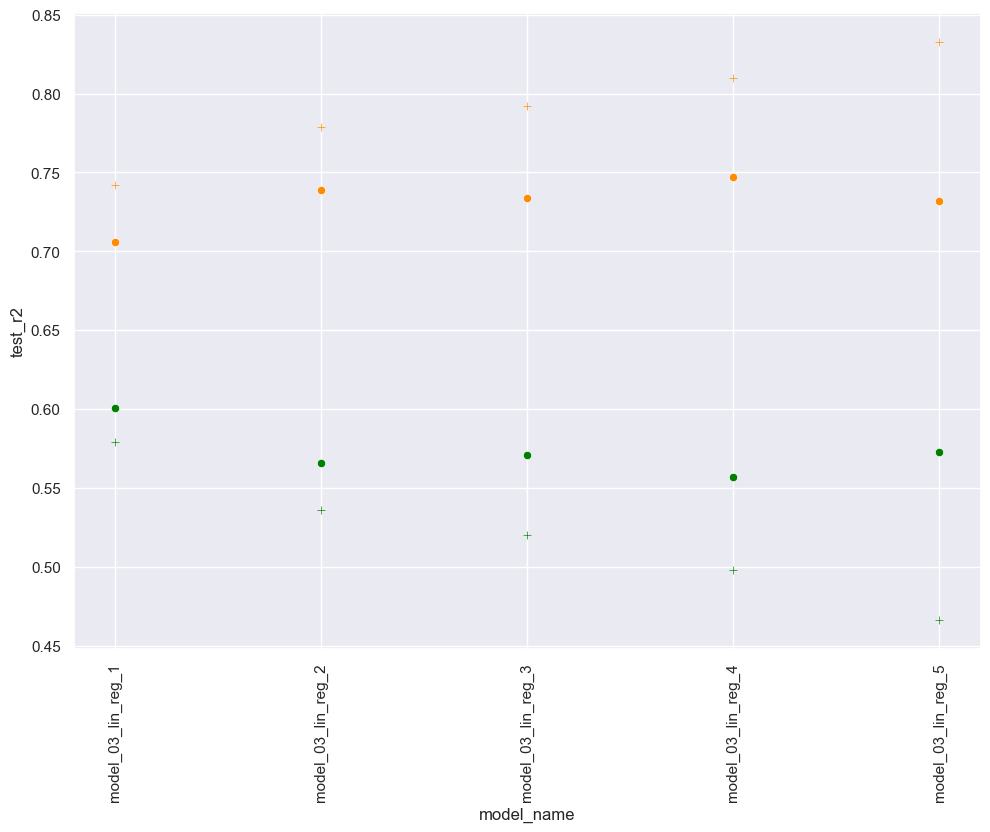

In [104]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [105]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_03_lin_reg_scaler_0,0.739
1,model_03_lin_reg_scaler_1,0.739
2,model_03_lin_reg_scaler_2,0.739


part df with the best models:

In [106]:
part_lin_reg = lin_reg_error_df.sort_values(by =['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:3]
part_lin_reg

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
3,model_03_lin_reg_4,0.498,0.810,0.557,0.747,0.059,0.063
1,model_03_lin_reg_2,0.536,0.779,0.566,0.739,0.030,0.040
2,model_03_lin_reg_3,0.520,0.792,0.571,0.734,0.051,0.058


---

### KNN Model 

+ with variable number of neighbors and variable distance metrics
+ unscaled!! - now with standart scaler

In [112]:
knn_error_lst = []
for metr in range(1,4):
    for neigh in np.arange(20,61,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr)
        knn.fit(X_train_normalized, y_train)

        y_pred_knn_test = knn.predict(X_test_normalized)
        y_pred_knn_train = knn.predict(X_train_normalized)
        rmse_test = mean_squared_error(y_test, y_pred_knn_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_knn_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)

        model_descrip = model_name + '_knn_'  + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
#knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_03_knn_1_20,0.477,0.825,0.520,0.780,0.043,0.045
1,model_03_knn_1_25,0.489,0.816,0.523,0.777,0.034,0.039
9,model_03_knn_2_20,0.482,0.821,0.525,0.776,0.043,0.045
2,model_03_knn_1_30,0.498,0.810,0.529,0.772,0.031,0.038
10,model_03_knn_2_25,0.494,0.813,0.530,0.771,0.036,0.042
18,model_03_knn_3_20,0.487,0.817,0.533,0.769,0.046,0.048
3,model_03_knn_1_35,0.505,0.804,0.534,0.768,0.029,0.036
11,model_03_knn_2_30,0.502,0.806,0.534,0.768,0.032,0.038
19,model_03_knn_3_25,0.498,0.809,0.536,0.766,0.038,0.043
12,model_03_knn_2_35,0.508,0.802,0.538,0.764,0.030,0.038


In [113]:
knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
3,model_03_knn_1_35,0.505,0.804,0.534,0.768,0.029,0.036
8,model_03_knn_1_60,0.526,0.787,0.553,0.751,0.027,0.036
5,model_03_knn_1_45,0.516,0.796,0.544,0.759,0.028,0.037
6,model_03_knn_1_50,0.519,0.793,0.547,0.756,0.028,0.037
7,model_03_knn_1_55,0.523,0.790,0.550,0.753,0.027,0.037
16,model_03_knn_2_55,0.525,0.788,0.553,0.751,0.028,0.037
25,model_03_knn_3_55,0.526,0.787,0.554,0.750,0.028,0.037
26,model_03_knn_3_60,0.530,0.784,0.557,0.747,0.027,0.037
2,model_03_knn_1_30,0.498,0.810,0.529,0.772,0.031,0.038
11,model_03_knn_2_30,0.502,0.806,0.534,0.768,0.032,0.038


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_71304/2214502480.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


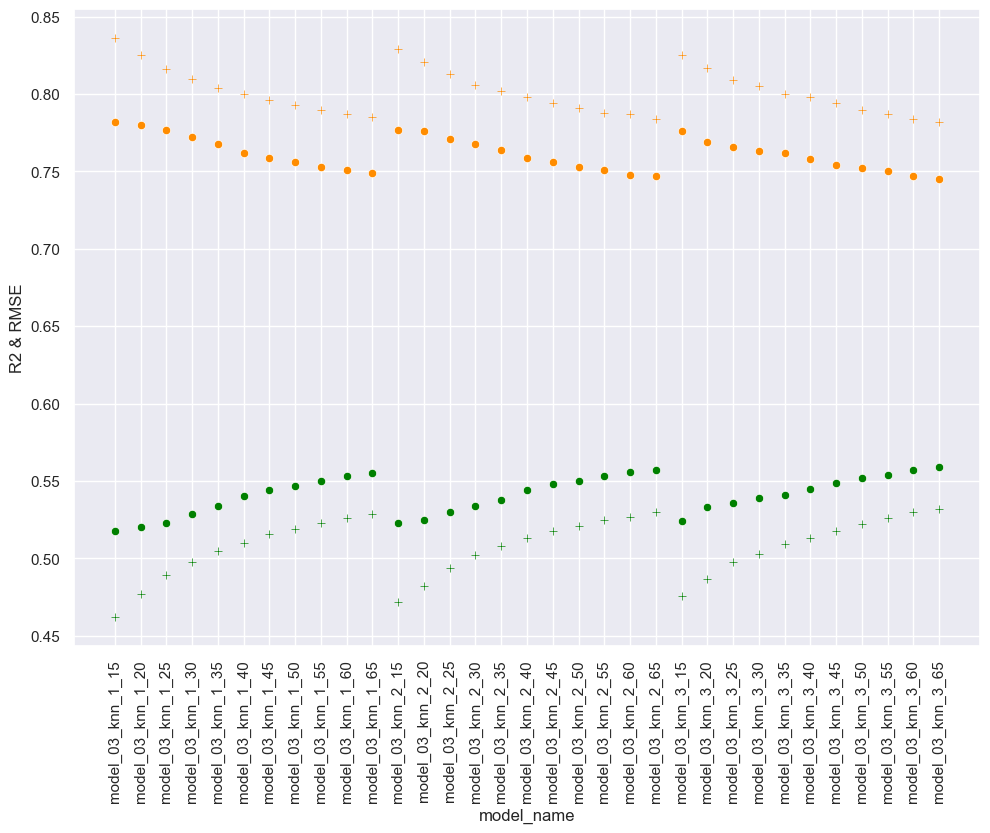

In [111]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [114]:
part_knn = knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:5]
#part_knn = knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
part_knn

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_03_knn_1_20,0.477,0.825,0.520,0.780,0.043,0.045
1,model_03_knn_1_25,0.489,0.816,0.523,0.777,0.034,0.039
9,model_03_knn_2_20,0.482,0.821,0.525,0.776,0.043,0.045
2,model_03_knn_1_30,0.498,0.810,0.529,0.772,0.031,0.038
10,model_03_knn_2_25,0.494,0.813,0.530,0.771,0.036,0.042


scaling data

In [107]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 40, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
1,model_03_knn_scaler_1,0.785
2,model_03_knn_scaler_2,0.782
0,model_03_knn_scaler_0,0.725


Decision Tree Model

In [119]:
dtree = DecisionTreeRegressor(max_depth = 3, 
                            max_leaf_nodes = 10)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=10)

In [66]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)

train_rmse  0.523
train_r2  0.79
test_rmse  0.607
test_r2  0.699


In [67]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 14,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

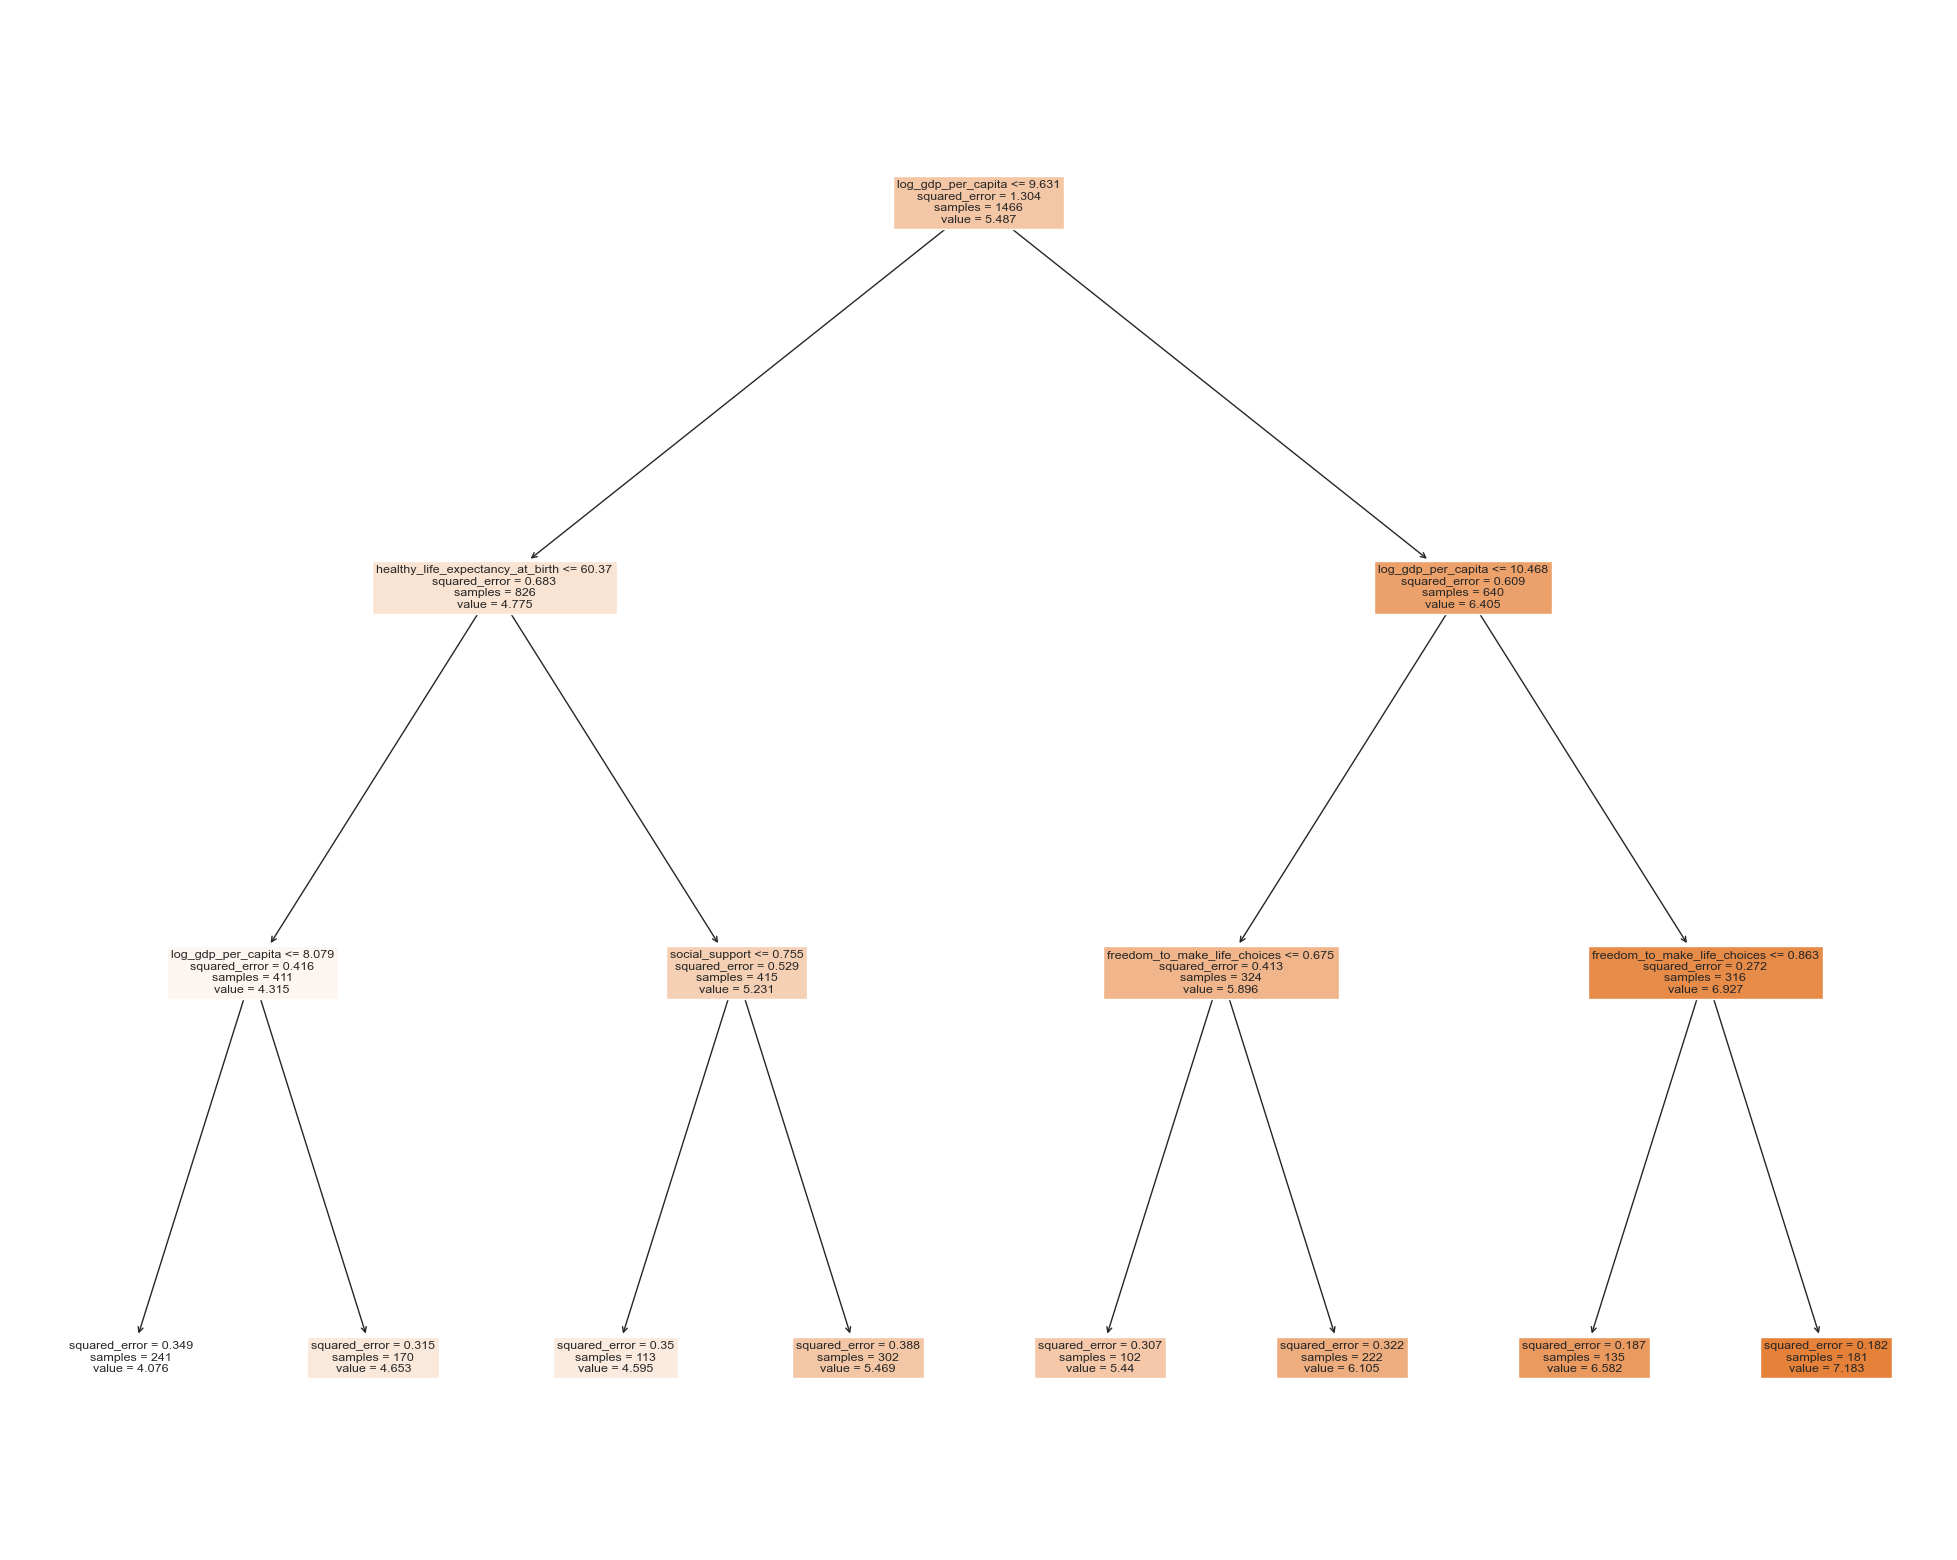

In [120]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [117]:
dectree_error_lst = []
for depth in np.arange(3,15,1):
    for leaf in np.arange(10,41,5): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df.sort_values(by = ['delta_R2', 'test_r2'] , ascending=[True, False])
#dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_03_dectree_dep_3_max_leaf_10,0.557,0.761,0.600,0.707,0.043,0.054
1,model_03_dectree_dep_3_max_leaf_15,0.557,0.761,0.600,0.707,0.043,0.054
2,model_03_dectree_dep_3_max_leaf_20,0.557,0.761,0.600,0.707,0.043,0.054
3,model_03_dectree_dep_3_max_leaf_25,0.557,0.761,0.600,0.707,0.043,0.054
4,model_03_dectree_dep_3_max_leaf_30,0.557,0.761,0.600,0.707,0.043,0.054
...,...,...,...,...,...,...,...
62,model_03_dectree_dep_11_max_leaf_40,0.458,0.839,0.585,0.721,0.127,0.118
69,model_03_dectree_dep_12_max_leaf_40,0.458,0.839,0.585,0.721,0.127,0.118
76,model_03_dectree_dep_13_max_leaf_40,0.458,0.839,0.585,0.721,0.127,0.118
83,model_03_dectree_dep_14_max_leaf_40,0.458,0.839,0.585,0.721,0.127,0.118


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_71304/3565193089.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


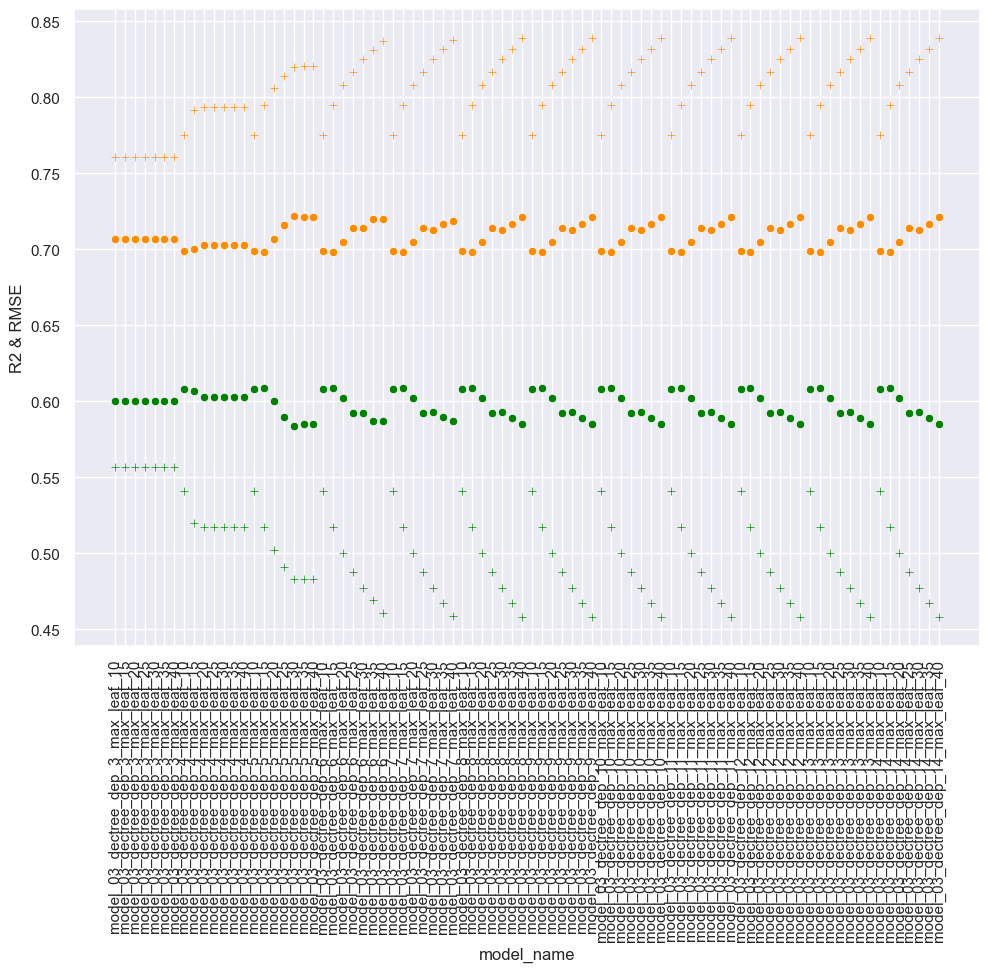

In [118]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

+ It is hard to decide which one is the optimum. But still everything is lower than knn, so we don't have to put so much effort in it.  

part df for the best models:

In [121]:
#part_dec_tree = dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:6]
part_dec_tree = dectree_error_df.sort_values(by = ['delta_R2', 'test_r2'] , ascending=[True, False]).iloc[:4]
part_dec_tree

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_03_dectree_dep_3_max_leaf_10,0.557,0.761,0.6,0.707,0.043,0.054
1,model_03_dectree_dep_3_max_leaf_15,0.557,0.761,0.6,0.707,0.043,0.054
2,model_03_dectree_dep_3_max_leaf_20,0.557,0.761,0.6,0.707,0.043,0.054
3,model_03_dectree_dep_3_max_leaf_25,0.557,0.761,0.6,0.707,0.043,0.054


Random Forest 

In [72]:
randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 5,
                                max_leaf_nodes = 25,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Min number of nodes: 49
Average number of nodes: 49
Max number of nodes: 49
Min maximum depth: 5
Average maximum depth: 5
Max maximum depth: 5
Number of Trees: 100
train_rmse  0.463
train_r2  0.835
test_rmse  0.531
test_r2  0.771


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [73]:
randforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 25,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [129]:
random_trees_error_lst = []
for tree_depth in np.arange(4,7,1):
    for tree_leaf in np.arange(15,51,15): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2,
                      'mean_node_num': mean_node_num,
                      'mean_depth': mean_depth,
                      'num_of_trees': num_of_trees})
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2,mean_node_num,mean_depth,num_of_trees
1,model_03_forest_tree_depth4_max_leaf_30,0.489,0.816,0.543,0.760,0.054,0.056,31,4,100
2,model_03_forest_tree_depth4_max_leaf_45,0.489,0.816,0.543,0.760,0.054,0.056,31,4,100
0,model_03_forest_tree_depth4_max_leaf_15,0.491,0.815,0.544,0.759,0.053,0.056,29,4,100
3,model_03_forest_tree_depth5_max_leaf_15,0.485,0.819,0.541,0.762,0.056,0.057,29,5,100
6,model_03_forest_tree_depth6_max_leaf_15,0.485,0.819,0.542,0.761,0.057,0.058,29,5,100
4,model_03_forest_tree_depth5_max_leaf_30,0.458,0.839,0.529,0.772,0.071,0.067,59,5,100
5,model_03_forest_tree_depth5_max_leaf_45,0.457,0.839,0.529,0.772,0.072,0.067,62,5,100
7,model_03_forest_tree_depth6_max_leaf_30,0.447,0.846,0.526,0.774,0.079,0.072,59,6,100
8,model_03_forest_tree_depth6_max_leaf_45,0.428,0.859,0.520,0.779,0.092,0.080,89,6,100


In [130]:
random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2,mean_node_num,mean_depth,num_of_trees
8,model_03_forest_tree_depth6_max_leaf_45,0.428,0.859,0.520,0.779,0.092,0.080,89,6,100
7,model_03_forest_tree_depth6_max_leaf_30,0.447,0.846,0.526,0.774,0.079,0.072,59,6,100
4,model_03_forest_tree_depth5_max_leaf_30,0.458,0.839,0.529,0.772,0.071,0.067,59,5,100
5,model_03_forest_tree_depth5_max_leaf_45,0.457,0.839,0.529,0.772,0.072,0.067,62,5,100
3,model_03_forest_tree_depth5_max_leaf_15,0.485,0.819,0.541,0.762,0.056,0.057,29,5,100
6,model_03_forest_tree_depth6_max_leaf_15,0.485,0.819,0.542,0.761,0.057,0.058,29,5,100
1,model_03_forest_tree_depth4_max_leaf_30,0.489,0.816,0.543,0.760,0.054,0.056,31,4,100
2,model_03_forest_tree_depth4_max_leaf_45,0.489,0.816,0.543,0.760,0.054,0.056,31,4,100
0,model_03_forest_tree_depth4_max_leaf_15,0.491,0.815,0.544,0.759,0.053,0.056,29,4,100


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_71304/3935140363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


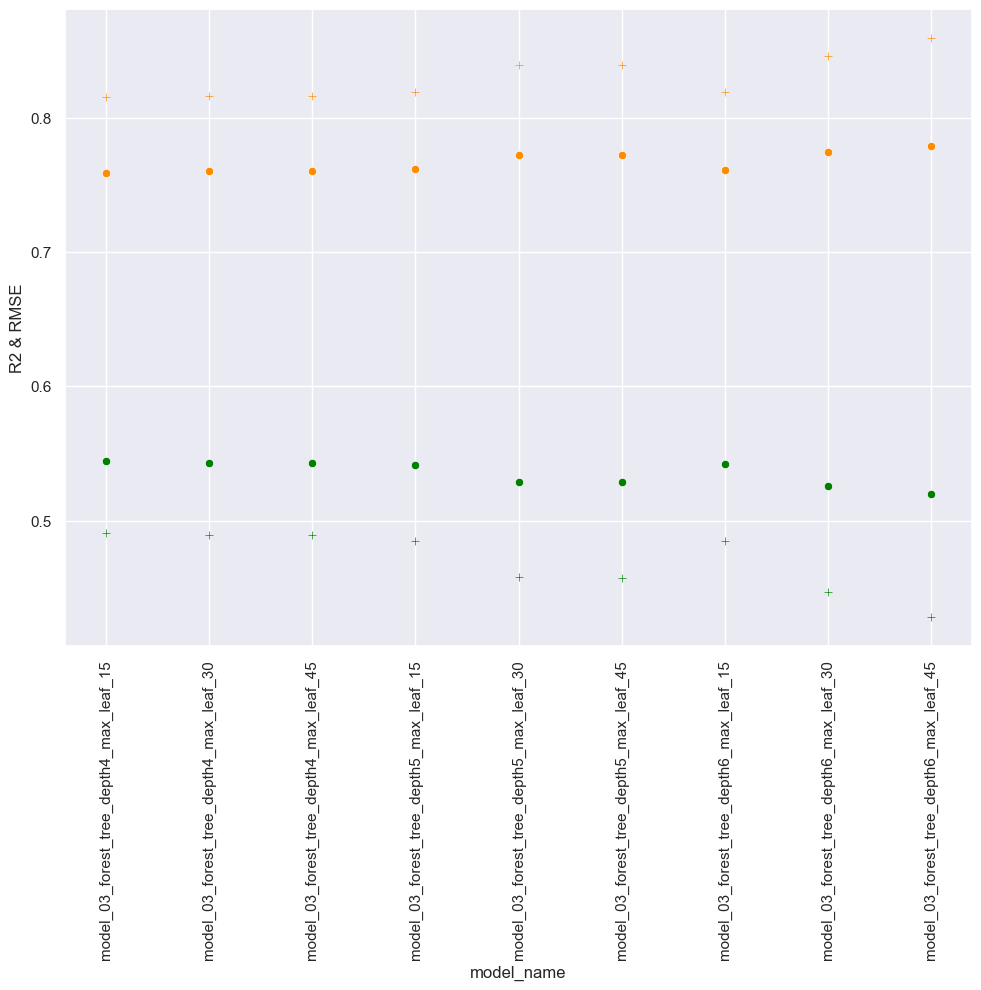

In [131]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

Like in the decision tree model max_depth = 3 and max_leaf_node = 8 is the optimum, we can just choose this combination

In [139]:
#part_forest = random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:4]
part_forest = random_trees_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:9]
part_forest

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2,mean_node_num,mean_depth,num_of_trees
1,model_03_forest_tree_depth4_max_leaf_30,0.489,0.816,0.543,0.760,0.054,0.056,31,4,100
2,model_03_forest_tree_depth4_max_leaf_45,0.489,0.816,0.543,0.760,0.054,0.056,31,4,100
0,model_03_forest_tree_depth4_max_leaf_15,0.491,0.815,0.544,0.759,0.053,0.056,29,4,100
3,model_03_forest_tree_depth5_max_leaf_15,0.485,0.819,0.541,0.762,0.056,0.057,29,5,100
6,model_03_forest_tree_depth6_max_leaf_15,0.485,0.819,0.542,0.761,0.057,0.058,29,5,100
4,model_03_forest_tree_depth5_max_leaf_30,0.458,0.839,0.529,0.772,0.071,0.067,59,5,100
5,model_03_forest_tree_depth5_max_leaf_45,0.457,0.839,0.529,0.772,0.072,0.067,62,5,100
7,model_03_forest_tree_depth6_max_leaf_30,0.447,0.846,0.526,0.774,0.079,0.072,59,6,100
8,model_03_forest_tree_depth6_max_leaf_45,0.428,0.859,0.520,0.779,0.092,0.080,89,6,100


Test: AdaBoostRegressor

In [140]:
ada = AdaBoostRegressor(n_estimators=50, random_state=8)
ada.fit(X_train, y_train)


y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_ada_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_ada_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_ada_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_ada_test, X_test).round(3)}])

ada_boost_error['delta_RMSE'] = abs(ada_boost_error['train_rmse'] - ada_boost_error['test_rmse'])
ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_03_ada_boost,0.505,0.804,0.555,0.749,0.05,0.055


that is really nice!!

In [134]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 8}

Test:  GradientBoostingRegressor

In [141]:
gbr = GradientBoostingRegressor(n_estimators=50,
                                criterion= 'squared_error',
                                max_depth = 4, 
                                max_leaf_nodes = 30,
                                random_state=123)
gbr.fit(X_train, y_train)


y_pred_gbr_test = gbr.predict(X_test)
y_pred_gbr_train = gbr.predict(X_train)

gbr_boost_error = pd.DataFrame([{'model_name': model_name + '_gbr_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_gbr_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_gbr_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_gbr_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_gbr_test, X_test).round(3)}])

gbr_boost_error['delta_RMSE'] = abs(gbr_boost_error['train_rmse'] - gbr_boost_error['test_rmse'])
gbr_boost_error['delta_R2'] = abs(gbr_boost_error['train_r2'] - gbr_boost_error['test_r2'])
gbr_boost_error


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_03_gbr_boost,0.398,0.878,0.524,0.777,0.126,0.101


In [136]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 14,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Concat the optimal models of each algorithm to one big error_df:  

In [142]:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      gbr_boost_error],  axis = 0)
                      
error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2,mean_node_num,mean_depth,num_of_trees
2,model_03_knn_1_30,0.498,0.810,0.529,0.772,0.031,0.038,NaN,NaN,NaN
1,model_03_knn_1_25,0.489,0.816,0.523,0.777,0.034,0.039,NaN,NaN,NaN
1,model_03_lin_reg_2,0.536,0.779,0.566,0.739,0.030,0.040,NaN,NaN,NaN
10,model_03_knn_2_25,0.494,0.813,0.530,0.771,0.036,0.042,NaN,NaN,NaN
0,model_03_knn_1_20,0.477,0.825,0.520,0.780,0.043,0.045,NaN,NaN,NaN
9,model_03_knn_2_20,0.482,0.821,0.525,0.776,0.043,0.045,NaN,NaN,NaN
0,model_03_dectree_dep_3_max_leaf_10,0.557,0.761,0.600,0.707,0.043,0.054,NaN,NaN,NaN
1,model_03_dectree_dep_3_max_leaf_15,0.557,0.761,0.600,0.707,0.043,0.054,NaN,NaN,NaN
2,model_03_dectree_dep_3_max_leaf_20,0.557,0.761,0.600,0.707,0.043,0.054,NaN,NaN,NaN
3,model_03_dectree_dep_3_max_leaf_25,0.557,0.761,0.600,0.707,0.043,0.054,NaN,NaN,NaN


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_71304/1721775396.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


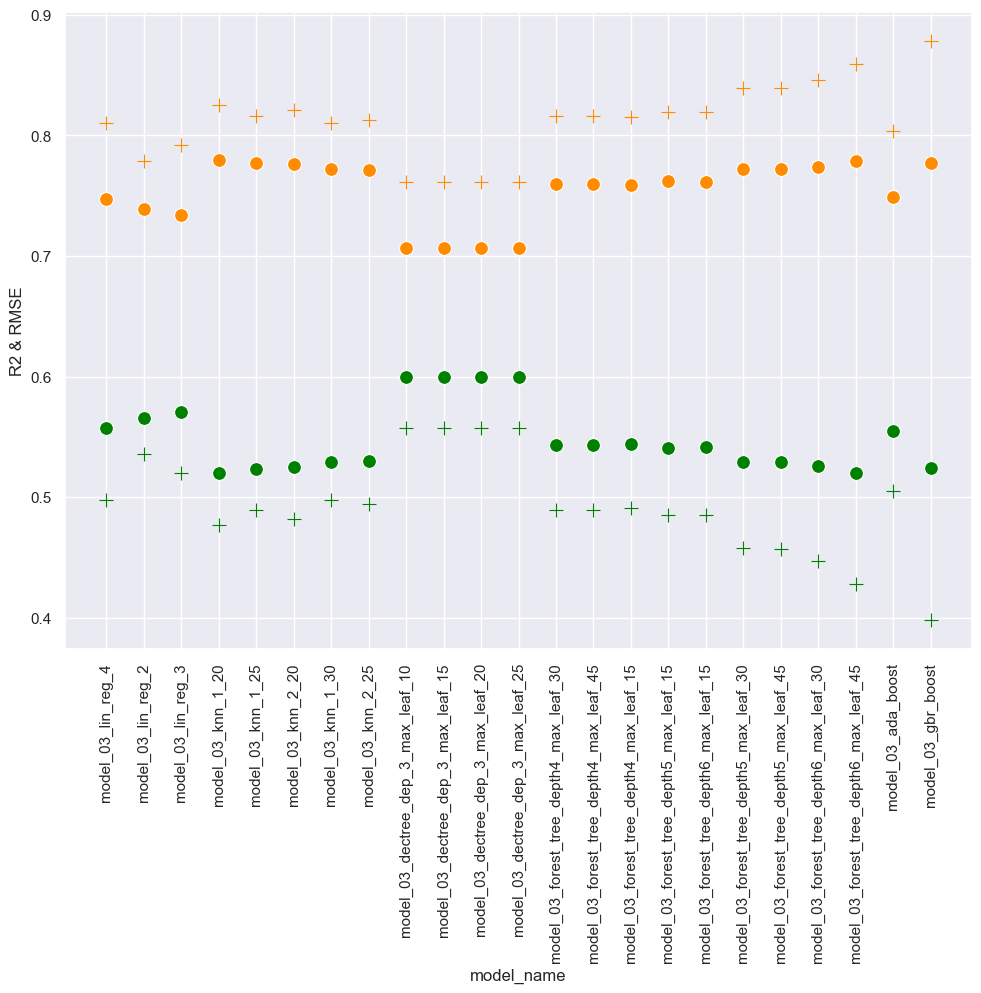

In [143]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_rmse', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();